In [131]:
from bankingSystem import * 
import networkx as nx
import warnings 
warnings.filterwarnings('ignore')
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [132]:
# simulation and data collection 
model = bankingSystem(banksFile="balanceSheetAnalysis/banksData.csv", targetLeverageRatio = 11.0, num_borrowing = 1, num_banks = 20)
simulationSteps = 100
for i in tqdm(range(simulationSteps)):
    model.step()

agent_data = model.datacollector.get_agent_vars_dataframe()
model_data = model.datacollector.get_model_vars_dataframe()

100%|██████████| 100/100 [00:00<00:00, 839.16it/s]


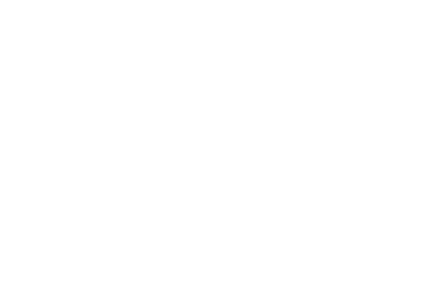

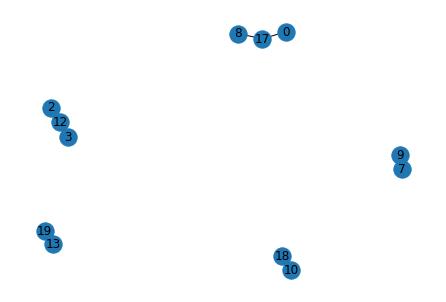

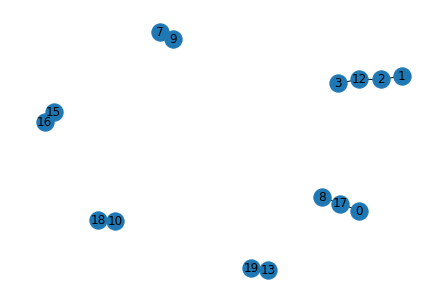

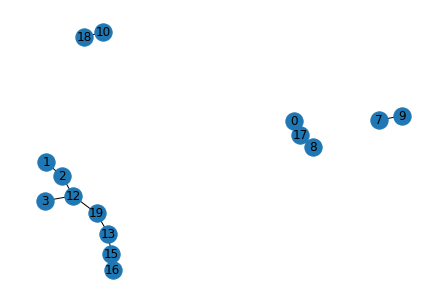

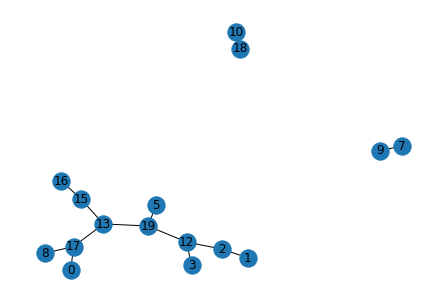

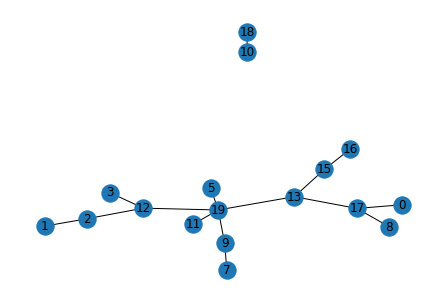

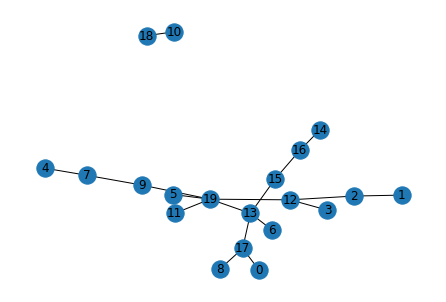

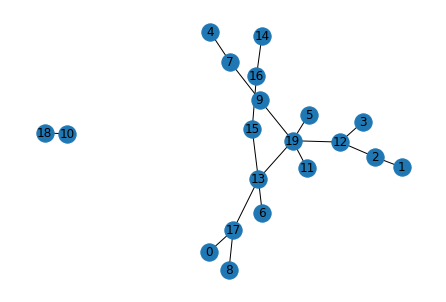

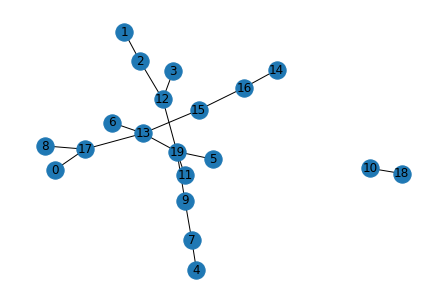

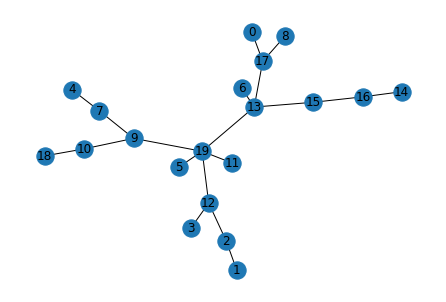

In [133]:
# create network graph
def netWorkGraph(matrix):
    size = matrix.shape[0]
    # Create a graph object with 5 nodes
    G = nx.Graph(n=matrix.shape[0])

    # Create a list of edge weights
    weights = []
    for i in range(size):
        for j in range(size):
            if matrix[i][j] > 0.2:
                G.add_edge(i, j)
                weights.append(matrix[i][j])

    # Visualize the graph using the draw function, setting the width parameter to the list of edge weights
    nx.draw(G, with_labels=True)
    plt.show()
    
for i in range(0, simulationSteps, 10):
    trustMatrix = model_data["Trust Matrix"].iloc[i]
    netWorkGraph(matrix=trustMatrix)